In [2]:
import pandas as pd
import rdkit
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import rdchem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolDrawing, DrawingOptions
import itertools
from itertools import combinations
from tqdm.notebook import tqdm
import random
from Rdkit_WLN_Ring_Scipt import show_atom_number, Internal_Iterator, Experimental_Iterator

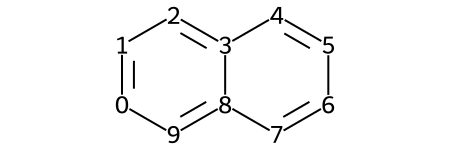

In [3]:
WLN = 'T6 AV DVJ'
smi = 'C1=CC=CC2=C1C=CC=C2'
mol = Chem.MolFromSmiles(smi)
cleaned_smiles = Chem.MolToSmiles(mol)
Base_mol = Chem.MolFromSmiles(cleaned_smiles) # this clean step is essential
show, _ = show_atom_number(Base_mol, 'atomLabel')
show

In [4]:
WLN_positions = {'B':2, 'C':3,'E':6,'F':7}
print(f'Indexes 0 to {len(WLN_positions)-1} to chose from on the Ring')
print(f'Bonding group head at atomic position {len(WLN_positions)}')
atom_assignments = [i[1] for i in WLN_positions.items()]
pos_combinations = sum([list(map(list, combinations(atom_assignments, i))) for i in range(len(atom_assignments) + 1)], [])
print(f'{len(pos_combinations)} Possible Combinations Found')

Indexes 0 to 3 to chose from on the Ring
Bonding group head at atomic position 4
16 Possible Combinations Found


In [115]:
moles = []
wlns = []
for pos in tqdm(pos_combinations):
    mol, smiles, wln_start = Internal_Iterator(pos, show, 'T6', 'AV DVJ' ,WLN_positions)
    if mol != 'Impossible':
        moles.append(mol)
        wlns.append(wln_start)
new_seeds = list(zip(moles,wlns))

  0%|          | 0/16 [00:00<?, ?it/s]

## Choose Fragment Type

In [122]:
# Small Fragments

def pruner(dataframe):
    columns = ['WLN', 'SMILES']
    for i in dataframe:
        if i not in columns:
            dataframe = dataframe.drop(columns=i)
    return dataframe

PATH = '/Users/michaelblakey/Documents/The_Frey_Group/WLN_Project/Code/AutoEncoder/core/data/'

Big_data = pd.read_csv(PATH +'full-reaugment_1.txt', delimiter='\t')

TYPE = 'Single-Ring'
Fragments = Big_data[Big_data.Labels.str.contains(TYPE)==True]

Fragments = pruner(Fragments[:1000])
print(Fragments.head(3))
print(Fragments.tail(3))

    WLN                     SMILES
0  RE2H            c1(ccccc1)Br.CC
1   R4K  c1(ccccc1)CCCC[N+](C)(C)C
2   RZ7        c1(ccccc1)N.CCCCCCC
            WLN                                             SMILES
1099  R4KB B78B  c1(c(cccc1)CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...
1100   R1F B48U  c1(c(cccc1)CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...
1101   R12 B7YK     c1(c(cccc1)CCCCCCCC([N+](C)(C)C)C)CCCCCCCCCCCC


In [ ]:
iterations = 1000

carbocycle = new_seeds[:1]
random_select = random.choices(new_seeds[1:], k=100)

for index,(new_mol,wln) in enumerate(random_select):
    new_smiles = []
    new_wln = []
    print(f'Seed: {index+1}, WLN: {wln}')
    for comb in tqdm(pos_combinations):
        for i in range(0,iterations):
            smiles, gen_wln = Experimental_Iterator(wln, new_mol ,WLN_positions,comb, Fragments)
            if smiles != 'Error':
                new_smiles.append(smiles)
                new_wln.append(gen_wln)

Seed: 1, WLN: T6 BN ES FSAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 2, WLN: T6 BO CO ENAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 3, WLN: T6 BO FNAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 4, WLN: T6 CS FSAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 5, WLN: T6 FNAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 6, WLN: T6 CSAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 7, WLN: T6 BOAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 8, WLN: T6 BN ES FSAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 9, WLN: T6 CSAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 10, WLN: T6 FNAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 11, WLN: T6 BO CSAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 12, WLN: T6 CSAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 13, WLN: T6 CS EO FNAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 14, WLN: T6 FNAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 15, WLN: T6 CS FSAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 16, WLN: T6 BOAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 17, WLN: T6 BO CN ES FOAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 18, WLN: T6 BN ES FSAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 19, WLN: T6 BO FNAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 20, WLN: T6 BN EOAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 21, WLN: T6 EN FNAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 22, WLN: T6 FNAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 23, WLN: T6 CSAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 24, WLN: T6 BN EOAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 25, WLN: T6 EN FNAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 26, WLN: T6 ESAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 27, WLN: T6 CN ESAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 28, WLN: T6 CN ESAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 29, WLN: T6 BO CN ES FOAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 30, WLN: T6 BO CN ES FOAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 31, WLN: T6 BN ES FSAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 32, WLN: T6 EN FNAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 33, WLN: T6 BO CO ENAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 34, WLN: T6 ESAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 35, WLN: T6 CS EO FNAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 36, WLN: T6 BO CSAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 37, WLN: T6 BN CN FOAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 38, WLN: T6 BN EOAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 39, WLN: T6 BO CN ES FOAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 40, WLN: T6 CN ESAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 41, WLN: T6 ESAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 42, WLN: T6 BO FNAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 43, WLN: T6 BN CN FOAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 44, WLN: T6 FNAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 45, WLN: T6 CSAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 46, WLN: T6 ESAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 47, WLN: T6 BN EOAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 48, WLN: T6 BOAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 49, WLN: T6 BN ES FSAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 50, WLN: T6 CSAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 51, WLN: T6 FNAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 52, WLN: T6 BO CSAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 53, WLN: T6 BO CN ES FOAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 54, WLN: T6 BO CSAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 55, WLN: T6 CS EO FNAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 56, WLN: T6 FNAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 57, WLN: T6 BO CN ES FOAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 58, WLN: T6 BO CN ES FOAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 59, WLN: T6 BN ES FSAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 60, WLN: T6 CS EO FNAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 61, WLN: T6 FNAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 62, WLN: T6 BN EOAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 63, WLN: T6 BO CN ES FOAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 64, WLN: T6 CS FSAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 65, WLN: T6 CN ESAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 66, WLN: T6 BN CN FOAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 67, WLN: T6 CN ESAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 68, WLN: T6 FNAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 69, WLN: T6 CN ESAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 70, WLN: T6 BO FNAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 71, WLN: T6 EN FNAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 72, WLN: T6 EN FNAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 73, WLN: T6 BO CO ENAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 74, WLN: T6 BN CN FOAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 75, WLN: T6 BN CN FOAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 76, WLN: T6 CS EO FNAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 77, WLN: T6 CS FSAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 78, WLN: T6 CN ESAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 79, WLN: T6 BO FNAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 80, WLN: T6 BO CO ENAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 81, WLN: T6 BO CN ES FOAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 82, WLN: T6 BN EOAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 83, WLN: T6 CN ESAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 84, WLN: T6 BO FNAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 85, WLN: T6 CS FSAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 86, WLN: T6 BO FNAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 87, WLN: T6 BO FNAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 88, WLN: T6 ESAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 89, WLN: T6 ESAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 90, WLN: T6 CN ESAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 91, WLN: T6 ESAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 92, WLN: T6 BN ES FSAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 93, WLN: T6 BO CN ES FOAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 94, WLN: T6 BN CN FOAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 95, WLN: T6 CS FSAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

Seed: 96, WLN: T6 CN ESAV DVJ


  0%|          | 0/16 [00:00<?, ?it/s]

In [118]:
pybel.ob.obErrorLog.SetOutputLevel(0)


Working = pd.DataFrame()
Working['SMILES'] = new_smiles
Working['WLN'] = new_wln

keys = []
for smi in tqdm(Working['SMILES']):
    mymol = pybel.readstring("smi", smi)
    key = mymol.write("inchikey")[:-1]
    keys.append(key)
    
Working['KEYS'] = keys
dup_index = []
for index, i in enumerate(Working['KEYS'].duplicated()):
    if i ==True:
        dup_index.append(index)
        
Working = Working.drop(index = dup_index)
Working = Working.reset_index()

print(f'{len(Working)} Potential Molecules Generated')

  0%|          | 0/6339 [00:00<?, ?it/s]

4454 Potential Molecules Generated


T6 ESAV DVJ BZSW


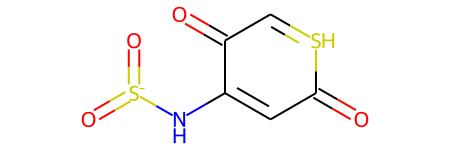

In [119]:
## Sanity Check
n = 112
test_wln = Working['WLN'][n]
test_smiles = Working['SMILES'][n]

print(test_wln)
Chem.MolFromSmiles(test_smiles)

In [120]:
Correct = Working[['WLN', 'SMILES']]

In [121]:
Correct.to_csv(f"./Generated_Data/{TYPE}_{WLN}_SEED_Variations.txt", sep='\t', header=False, index=False)